In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

In [356]:
df = pd.read_csv("cs.csv",encoding='cp1252')

In [357]:
# df = df.drop('id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Age                                                300 non-null    object
 1   Married_Status                                     300 non-null    object
 2   How_may_money_you_can_get_in_one_month             300 non-null    object
 3   How_many_hours_can_spend_to_degree_in_once_a_week  300 non-null    object
 4   Emploment_status                                   300 non-null    object
 5   ol_maths                                           300 non-null    object
 6   ol_science                                         300 non-null    object
 7   ol_history                                         300 non-null    object
 8   ol_primary_language                                300 non-null    object
 9   ol_english           

In [358]:
df.head()

,Age,Married_Status,How_may_money_you_can_get_in_one_month,How_many_hours_can_spend_to_degree_in_once_a_week,Emploment_status,ol_maths,ol_science,ol_history,ol_primary_language,ol_english,...,grade_for_subject03,al_stream,al_english,al_subject1,grade_for_subject1,al_subject2,grade_for_subject2,al_subject3,grade_for_subject3,degree
0,21-30 years,Single,"30,000 - 50,000",More than 20 hours,Employed part-time,A,B,B,B,S,...,C,Mathematics,C,Combine Mathematics,S,Physics,C,Chemistry,C,Bachelor of Technology - Electrical Engineering
1,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,C,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...
2,15-20 years,Single,"Less than 30,000",More than 20 hours,Unemployed,A,A,B,B,A,...,B,Science,B,Agro Technology,C,Biology,S,Chemistry,S,Bachelor of Technology (BTech) Honours in Agri...
3,21-30 years,Married,"70,000 - 90,000",16-20 hours,Employed full-time,A,B,A,B,A,...,A,Mathematics,B,Combine Mathematics,S,Physics,C,Chemistry,C,Bachelor of Technology - Civil Engineering
4,21-30 years,Married,"More than 90,000",11-15 hours,Employed part-time,A,A,C,A,A,...,A,Mathematics,B,Combine Mathematics,C,Chemistry,C,Physics,C,Bachelor of Software Engineering Honours


In [359]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Age', 'Married_Status', 'How_may_money_you_can_get_in_one_month', 'How_many_hours_can_spend_to_degree_in_once_a_week', 'Emploment_status', 'ol_maths', 'ol_science', 'ol_history', 'ol_primary_language', 'ol_english', 'ol_religion', 'ol_group01_subject', 'grade_for_subject01', 'ol_group2_subject', 'grade_for_subject02', 'ol_group3_subject', 'grade_for_subject03', 'al_stream', 'al_english', 'al_subject1', 'grade_for_subject1', 'al_subject2', 'grade_for_subject2', 'al_subject3', 'grade_for_subject3', 'degree']


In [360]:
label_encoder = LabelEncoder()
# enc.fit(df['city'])
# df['city'] = enc.transform(df['city'])
# df.head(10)
for column in df.columns:
    # Check if the column is of object or string type (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,Married_Status,How_may_money_you_can_get_in_one_month,How_many_hours_can_spend_to_degree_in_once_a_week,Emploment_status,ol_maths,ol_science,ol_history,ol_primary_language,ol_english,...,grade_for_subject03,al_stream,al_english,al_subject1,grade_for_subject1,al_subject2,grade_for_subject2,al_subject3,grade_for_subject3,degree
0,1,1,0,4,1,0,1,1,1,3,...,2,2,2,3,3,4,1,2,2,8
1,1,1,3,4,2,2,2,1,2,2,...,1,0,2,1,1,3,1,1,2,2
2,0,1,3,4,2,0,0,1,1,0,...,1,3,1,0,2,0,2,2,3,5
3,1,0,2,2,0,0,1,0,1,0,...,0,2,1,3,3,4,1,2,2,6
4,1,0,4,1,1,0,0,2,0,0,...,0,2,1,3,2,2,1,4,2,4


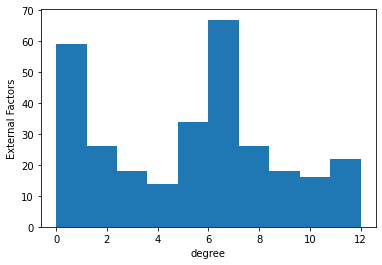

In [361]:
plt.hist(df["degree"])
plt.xlabel("degree")
plt.ylabel("External Factors")
plt.show()

In [362]:
X = df[['Age', 'Married_Status', 'How_may_money_you_can_get_in_one_month', 'How_many_hours_can_spend_to_degree_in_once_a_week', 'Emploment_status', 'ol_maths', 'ol_science', 'ol_history', 'ol_primary_language', 'ol_english', 'ol_religion', 'ol_group01_subject', 'grade_for_subject01', 'ol_group2_subject', 'grade_for_subject02', 'ol_group3_subject', 'grade_for_subject03', 'al_stream', 'al_english', 'al_subject1', 'grade_for_subject1', 'al_subject2', 'grade_for_subject2', 'al_subject3', 'grade_for_subject3']].values
y = df['degree'].values

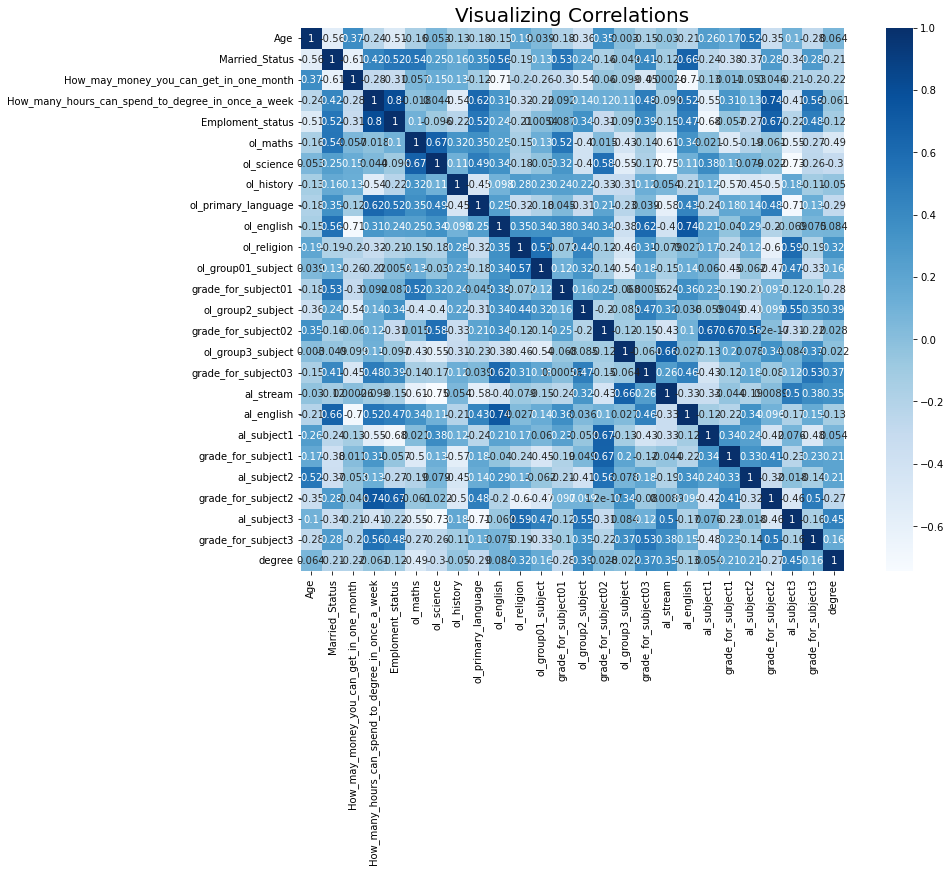

In [363]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [365]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA,KernelPCA

# sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# pca = PCA(n_components=2,svd_solver='full')
# X_train_pca = pca.fit_transform(X_train_std)
# X_test_pca = pca.transform(X_test_std)
# pca.explained_variance_ratio_

# kpca = KernelPCA(kernel="rbf", gamma=1)
# X_kpca_train = kpca.fit_transform(X_train_pca)
# X_kpca_test = kpca.transform(X_test_pca)

# X_train_pca[:1]
# fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1],color='red',marker='o')
# ax[1].scatter(X_kpca_train[:, 0], X_kpca_train[:, 1])
# ax[0].set_xlabel('Before RBF')
# ax[1].set_yticks([])
# ax[1].set_xlabel('After RBF')

In [366]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [367]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [368]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.8057665239181144


In [369]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.72


In [370]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.77


In [371]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

MSE: 2.00


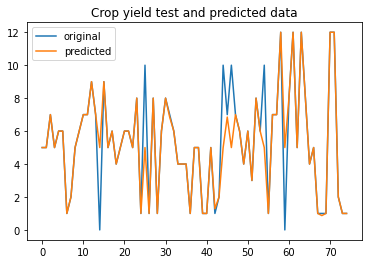

In [372]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Crop yield test and predicted data")
plt.legend()
plt.show()

In [373]:
# predictions = xgbr.predict(X_test)

# # Sort the predictions by the predicted probability for the first class
# predictions = sorted(predictions, key=lambda x: x[0])

# # Get the second value in the sorted list
# second_value = predictions[1].item()

# # Print the second value
# print(second_value)

results_df = pd.DataFrame({'Prediction': predictions, 'Degree': y_test})
results_df = results_df.sort_values(by='Prediction', ascending=False)
top_4_degrees = results_df['Degree'].head(4)
print("Most Suitable 4 Degree Courses:")
for degree in top_4_degrees:
    print(degree)


Most Suitable 4 Degree Courses:
1
7
5
10
